In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modelxgboost import RomModelXgboost

In [2]:
__XGBOOST_DEFAULT_PARAM__ = {
    "n_estimators": 1000,
    "max_depth": 8,
    "learning_rate": 0.05,
    "device": "cpu",
    "early_stopping_rounds": 20
}

In [3]:
df = pd.read_csv('_data.csv')
data = {}
for col in df.columns:
    data[col] = df[col].values
x = np.column_stack([data['s1'], data['s2'], data["s3"]])
y = np.column_stack([data['s4'], data['s5']])
x_train = x[:700] 
y_train = y[:700]
x_valid = x[700:]
y_valid = y[700:]
rmx = RomModelXgboost(**__XGBOOST_DEFAULT_PARAM__)
rmx.train(x_train, y_train, x_valid, y_valid)

[0]	validation_0-rmse:0.61793	validation_1-rmse:0.60453
[1]	validation_0-rmse:0.58884	validation_1-rmse:0.57667
[2]	validation_0-rmse:0.56117	validation_1-rmse:0.55032
[3]	validation_0-rmse:0.53487	validation_1-rmse:0.52504
[4]	validation_0-rmse:0.50985	validation_1-rmse:0.50145
[5]	validation_0-rmse:0.48606	validation_1-rmse:0.47909
[6]	validation_0-rmse:0.46342	validation_1-rmse:0.45796
[7]	validation_0-rmse:0.44187	validation_1-rmse:0.43740
[8]	validation_0-rmse:0.42139	validation_1-rmse:0.41825
[9]	validation_0-rmse:0.40182	validation_1-rmse:0.40072
[10]	validation_0-rmse:0.38324	validation_1-rmse:0.38370
[11]	validation_0-rmse:0.36549	validation_1-rmse:0.36737
[12]	validation_0-rmse:0.34865	validation_1-rmse:0.35210
[13]	validation_0-rmse:0.33258	validation_1-rmse:0.33810
[14]	validation_0-rmse:0.31727	validation_1-rmse:0.32403
[15]	validation_0-rmse:0.30265	validation_1-rmse:0.31048
[16]	validation_0-rmse:0.28875	validation_1-rmse:0.29723
[17]	validation_0-rmse:0.27553	validation

c:\Users\ShangguanKL\Documents\coding\xgboost\.venv\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.22866	validation_1-rmse:0.24303
[22]	validation_0-rmse:0.21833	validation_1-rmse:0.23404
[23]	validation_0-rmse:0.20847	validation_1-rmse:0.22521
[24]	validation_0-rmse:0.19909	validation_1-rmse:0.21725
[25]	validation_0-rmse:0.19016	validation_1-rmse:0.20941
[26]	validation_0-rmse:0.18166	validation_1-rmse:0.20218
[27]	validation_0-rmse:0.17357	validation_1-rmse:0.19509
[28]	validation_0-rmse:0.16585	validation_1-rmse:0.18849
[29]	validation_0-rmse:0.15850	validation_1-rmse:0.18225
[30]	validation_0-rmse:0.15149	validation_1-rmse:0.17592
[31]	validation_0-rmse:0.14483	validation_1-rmse:0.17040
[32]	validation_0-rmse:0.13845	validation_1-rmse:0.16495
[33]	validation_0-rmse:0.13240	validation_1-rmse:0.15986
[34]	validation_0-rmse:0.12662	validation_1-rmse:0.15480
[35]	validation_0-rmse:0.12111	validation_1-rmse:0.15022
[36]	validation_0-rmse:0.11587	validation_1-rmse:0.14601
[37]	validation_0-rmse:0.11087	validation_1-rmse:0.14186
[38]	validation_0-rmse:0.10611	

In [4]:
p_valid = rmx.predict_with_best(x_valid)

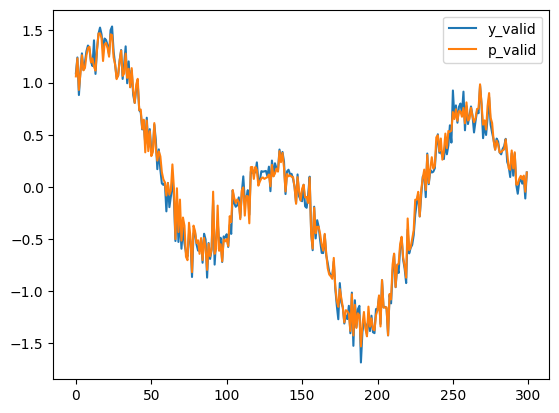

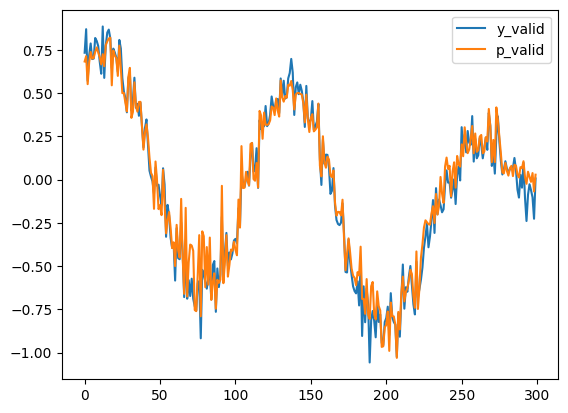

In [5]:
plt.plot(y_valid[:, 0], label="y_valid")
plt.plot(p_valid[:, 0], label="p_valid")
plt.legend()
plt.show()
plt.plot(y_valid[:, 1], label="y_valid")
plt.plot(p_valid[:, 1], label="p_valid")
plt.legend()
plt.show()

In [6]:
rmx.save_model("model.json")

In [7]:
rmx.convert_to_onnx("model.onnx")